<b><h2> CROP YIELD PREDICTION IN INDIA </h2></b>



# Data Pre-Processing


In [2]:
# importing necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset

crop_data = pd.read_csv("../Dataset/Crop_Yield_Data.csv")

In [4]:
print(crop_data.shape)

#rows X columns

(49999, 10)


In [5]:
# dataset columns
print(crop_data.columns)

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Temperature', 'Humidity', 'Soil_Moisture', 'Area', 'Production'],
      dtype='object')


In [40]:
# Statistical summary of data frame.

crop_data.describe()

,Crop_Year,Temperature,Humidity,Soil_Moisture,Area,Production
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,4.978400e+04
mean,2005.879138,34.445489,44.776116,53.110502,7363.389469,4.132019e+05
std,5.106092,3.498524,6.662406,5.258764,27927.935789,1.232609e+07
min,1997.000000,25.000000,35.000000,45.000000,0.200000,0.000000e+00
25%,2002.000000,34.000000,40.000000,50.000000,76.000000,8.700000e+01
50%,2006.000000,36.000000,42.000000,54.000000,436.000000,6.384400e+02
75%,2010.000000,36.000000,50.000000,55.000000,2546.500000,5.615000e+03
max,2014.000000,37.000000,55.000000,62.000000,877029.000000,7.801620e+08


In [41]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Temperature        0
Humidity           0
Soil_Moisture      0
Area               0
Production       215
dtype: int64

# **Data Exploration**
In this section, we will explore the dataset to understand its structure, summary statistics, missing values, and relationships between features.

In [42]:
# Display the first 5 rows of the dataset
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0


In [43]:
# Show dataset info (column types, non-null counts, memory usage)
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     49999 non-null  object 
 1   District_Name  49999 non-null  object 
 2   Crop_Year      49999 non-null  int64  
 3   Season         49999 non-null  object 
 4   Crop           49999 non-null  object 
 5   Temperature    49999 non-null  int64  
 6   Humidity       49999 non-null  int64  
 7   Soil_Moisture  49999 non-null  int64  
 8   Area           49999 non-null  float64
 9   Production     49784 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 3.8+ MB


In [44]:
# Show summary statistics for numeric columns
crop_data.describe()

,Crop_Year,Temperature,Humidity,Soil_Moisture,Area,Production
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,4.978400e+04
mean,2005.879138,34.445489,44.776116,53.110502,7363.389469,4.132019e+05
std,5.106092,3.498524,6.662406,5.258764,27927.935789,1.232609e+07
min,1997.000000,25.000000,35.000000,45.000000,0.200000,0.000000e+00
25%,2002.000000,34.000000,40.000000,50.000000,76.000000,8.700000e+01
50%,2006.000000,36.000000,42.000000,54.000000,436.000000,6.384400e+02
75%,2010.000000,36.000000,50.000000,55.000000,2546.500000,5.615000e+03
max,2014.000000,37.000000,55.000000,62.000000,877029.000000,7.801620e+08


In [45]:
# Show the number of unique values in each column
crop_data.nunique()

State_Name           7
District_Name      112
Crop_Year           18
Season               6
Crop                80
Temperature          5
Humidity             7
Soil_Moisture        8
Area             11751
Production       15553
dtype: int64

In [46]:
# Show the count of each unique crop in the dataset
crop_counts = crop_data['Crop'].value_counts()
crop_counts.head(10)

Crop
Rice                 3853
Maize                3249
Moong(Green Gram)    2084
Dry chillies         1595
Arhar/Tur            1578
Urad                 1531
Sugarcane            1517
Wheat                1497
Sesamum              1481
Small millets        1396
Name: count, dtype: int64

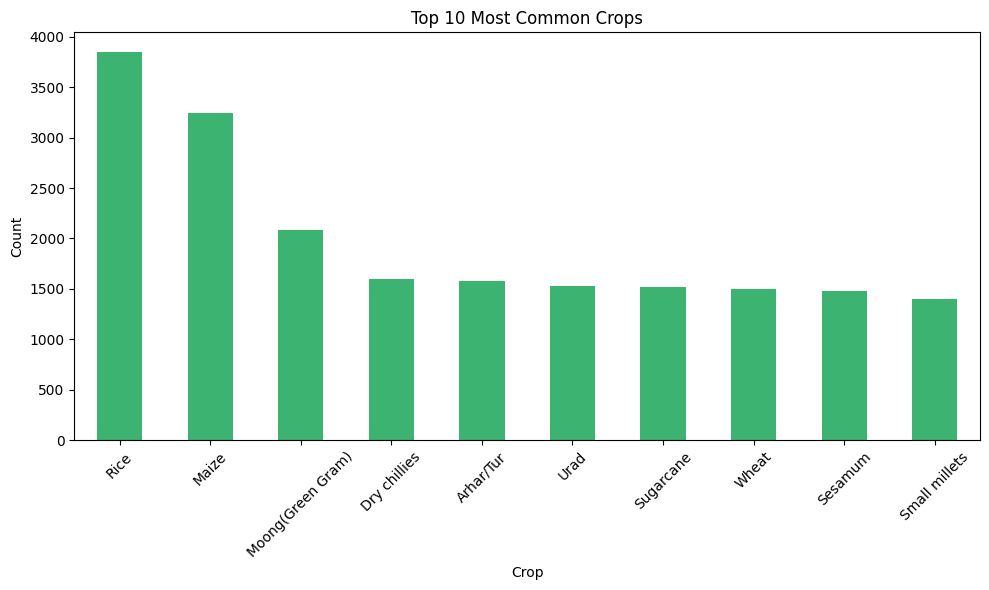

In [47]:
# Visualize the top 10 most common crops
plt.figure(figsize=(10,6))
crop_counts.head(10).plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Most Common Crops')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

State_Name
Bihar                          18885
Assam                          14628
Andhra Pradesh                  9628
Chhattisgarh                    4019
Arunachal Pradesh               2546
Andaman and Nicobar Islands      203
Chandigarh                        90
Name: count, dtype: int64


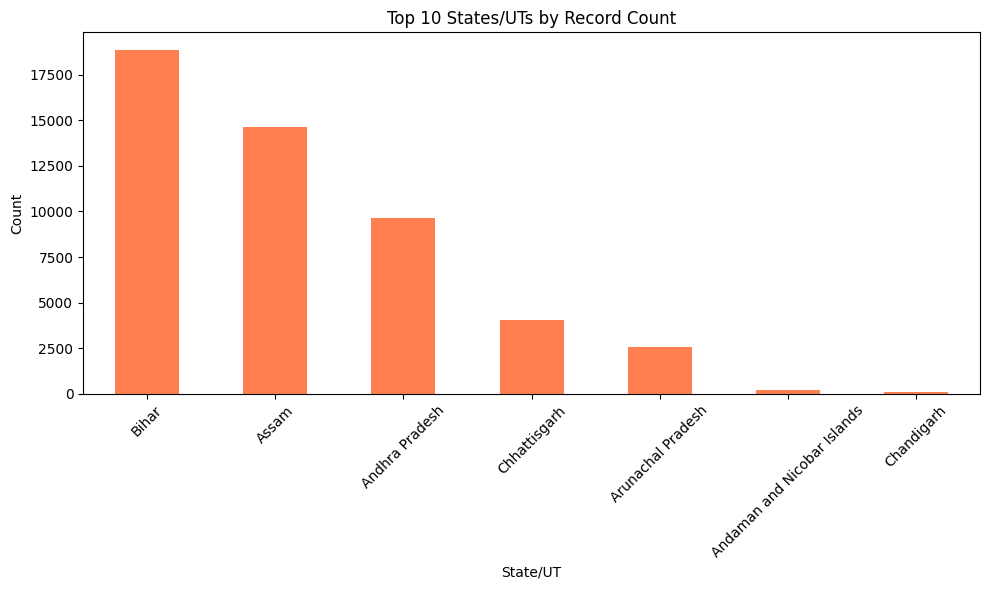

In [48]:
# Show the number of records per state/UT and visualize the top 10
state_counts = crop_data['State_Name'].value_counts()
print(state_counts.head(10))

plt.figure(figsize=(10,6))
state_counts.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 States/UTs by Record Count')
plt.xlabel('State/UT')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

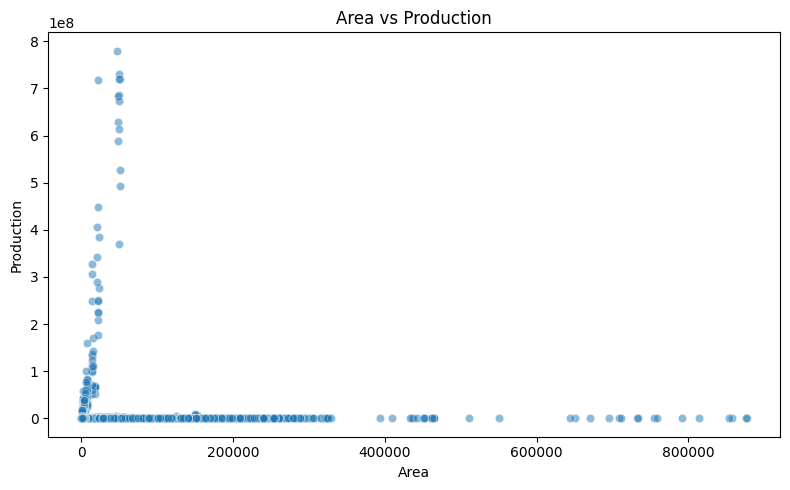

In [49]:
# Visualize the relationship between Area and Production
plt.figure(figsize=(8,5))
sns.scatterplot(x='Area', y='Production', data=crop_data, alpha=0.5)
plt.title('Area vs Production')
plt.xlabel('Area')
plt.ylabel('Production')
plt.tight_layout()
plt.show()

# Feature Selection

In [6]:
# Replacing missing values with mean of the production coloumn
crop_data['Production'] = crop_data['Production'].fillna(crop_data['Production'].mean())
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0
...,...,...,...,...,...,...,...,...,...,...
49994,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Small millets,36,35,45,27.0,7.0
49995,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Soyabean,37,40,46,27.0,32.0
49996,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Sunflower,36,41,50,450.0,213.0
49997,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Urad,37,42,55,1778.0,309.0


In [7]:
#checking
crop_data.isnull().values.any()

np.False_

In [8]:
# Displaying State Names present in the dataset
print(crop_data.State_Name.unique())
print('Total count of states and Union Territories:', len(crop_data.State_Name.unique()))


['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh']
Total count of states and Union Territories: 7


In [9]:
# Adding a new column Yield which indicates Production per unit Area. 

crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data.head(10) 

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,34,45,52,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,34,55,62,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,35,50,59,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,25,55,55,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,36,35,45,40.0,169.0,4.225000


In [10]:
# Dropping unnecessary columns

data = crop_data.drop(['State_Name'], axis = 1)

In [11]:
data.select_dtypes(include=[np.number]).corr()

,Crop_Year,Temperature,Humidity,Soil_Moisture,Area,Production,Yield
Crop_Year,1.000000,0.000505,-0.001339,-0.001533,0.000842,0.007962,0.015756
Temperature,0.000505,1.000000,-0.696194,-0.286471,-0.000204,0.005063,0.000367
Humidity,-0.001339,-0.696194,1.000000,0.812524,-0.000787,-0.002596,-0.000893
Soil_Moisture,-0.001533,-0.286471,0.812524,1.000000,0.000700,-0.000754,0.001810
Area,0.000842,-0.000204,-0.000787,0.000700,1.000000,0.027836,-0.012039
Production,0.007962,0.005063,-0.002596,-0.000754,0.027836,1.000000,0.027050
Yield,0.015756,0.000367,-0.000893,0.001810,-0.012039,0.027050,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

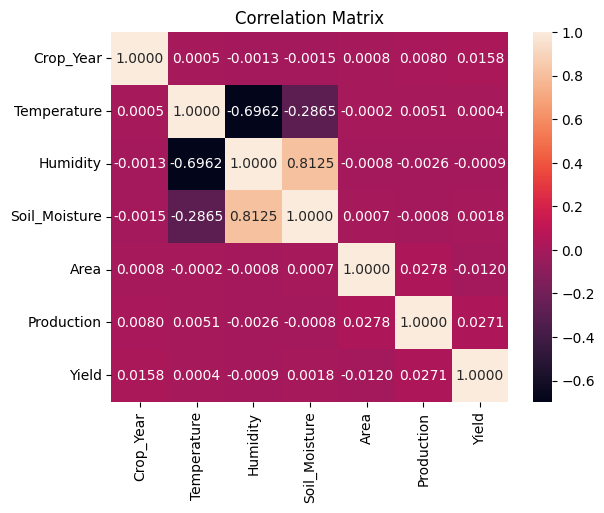

In [56]:

sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, fmt='.4f')
plt.title('Correlation Matrix')

In [12]:
dummy = pd.get_dummies(data)
dummy


,Crop_Year,Temperature,Humidity,Soil_Moisture,Area,Production,Yield,District_Name_ANANTAPUR,District_Name_ANJAW,District_Name_ARARIA,...,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,2000,36,35,45,1254.0,2000.0,1.594896,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2000,37,40,46,2.0,1.0,0.500000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2000,36,41,50,102.0,321.0,3.147059,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2000,37,42,55,176.0,641.0,3.642045,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2000,36,40,54,720.0,165.0,0.229167,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2006,36,35,45,27.0,7.0,0.259259,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49995,2006,37,40,46,27.0,32.0,1.185185,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49996,2006,36,41,50,450.0,213.0,0.473333,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49997,2006,37,42,55,1778.0,309.0,0.173791,False,False,False,...,False,False,False,False,True,False,False,False,False,False


<b><i> Splitting dataset into train and test dataset </i></b>

In [13]:

from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75% train dataset

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (37499, 203)
x_test : (12500, 203)
y_train : (37499,)
y_test : (12500,)


In [14]:
print(x_train)
print(y_train)

       Crop_Year  Temperature  Humidity  Soil_Moisture     Area  \
27434       2009           36        40             54   2761.0   
13400       1999           36        35             45  57620.0   
883         2013           37        40             46    935.0   
7303        2004           36        40             54   9065.0   
49251       2005           36        35             45   7505.0   
...          ...          ...       ...            ...      ...   
11284       2002           35        50             59    130.0   
44732       2013           25        55             55     29.0   
38158       2010           37        42             55   2347.0   
860         2013           34        45             52      2.0   
15795       2009           37        40             46    767.0   

       District_Name_ANANTAPUR  District_Name_ANJAW  District_Name_ARARIA  \
27434                    False                False                  True   
13400                    False           

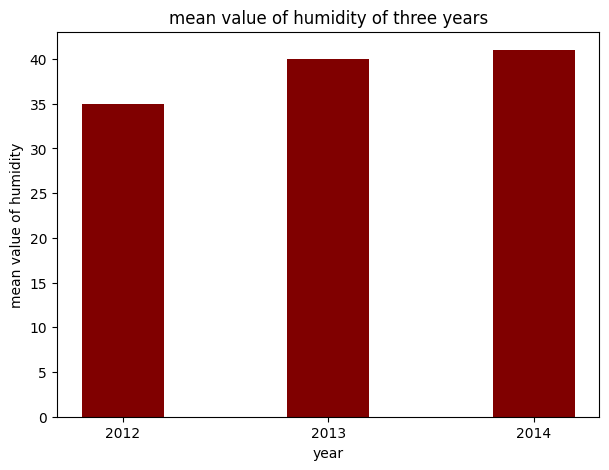

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# creating the dataset
year = [2012,2013,2014]
values = []
data1 = pd.DataFrame(crop_data)
for x in range(3):
  curyearsum=0
  count=0
  for y in range(1000):
    if(data1.iloc[y]["Crop_Year"] == year[x]):
      count+=1;
      curyearsum += data1.iloc[x]["Humidity"]
  values.append(curyearsum/count)
fig = plt.figure(figsize = (7, 5))
 
# creating the bar plot
x = np.array(["2012","2013","2014"])
y = np.array(values)
plt.xlabel("year")
plt.ylabel("mean value of humidity")
plt.title("mean value of humidity of three years")
plt.bar(x,y,color ='maroon', width = 0.4)
plt.show()

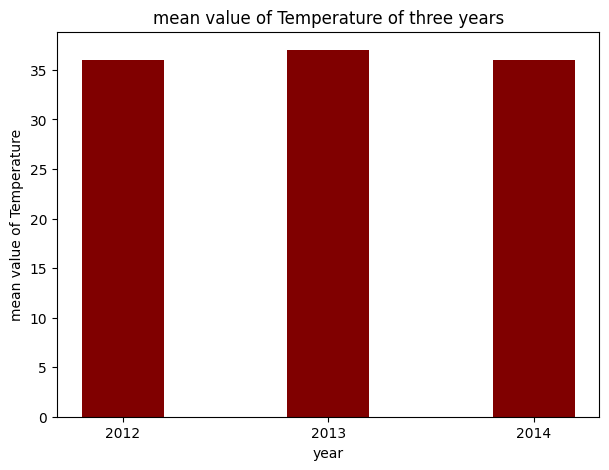

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# creating the dataset
year = [2012,2013,2014]
values = []
data1 = pd.DataFrame(crop_data)
for x in range(3):
  curyearsum=0
  count=0
  for y in range(1000):
    if(data1.iloc[y]["Crop_Year"] == year[x]):
      count+=1;
      curyearsum += data1.iloc[x]["Temperature"]
  values.append(curyearsum/count)
fig = plt.figure(figsize = (7, 5))
 
# creating the bar plot
x = np.array(["2012","2013","2014"])
y = np.array(values)
plt.xlabel("year")
plt.ylabel("mean value of Temperature")
plt.title("mean value of Temperature of three years")
plt.bar(x,y,color ='maroon', width = 0.4)
plt.show()

# **Linear Regression**

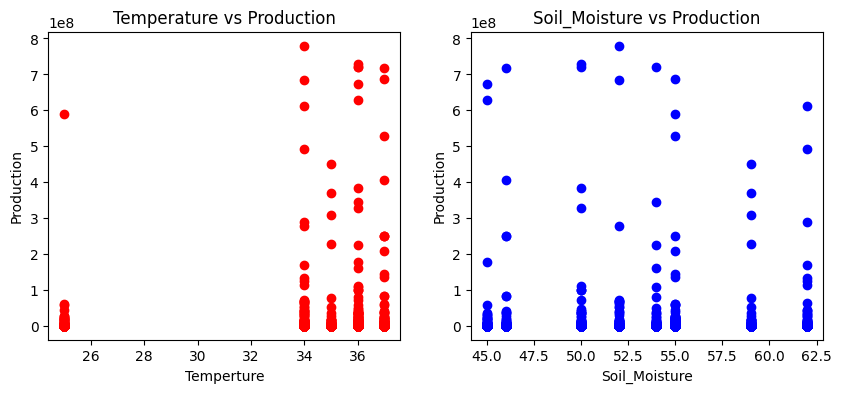

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(crop_data['Temperature'], crop_data['Production'], color='red')
axes[1].scatter(crop_data['Soil_Moisture'], crop_data['Production'], color='blue')
axes[0].set_title("Temperature vs Production")
axes[1].set_title("Soil_Moisture vs Production")
axes[0].set_ylabel("Production")
axes[0].set_xlabel("Temperture")
axes[1].set_ylabel("Production")
axes[1].set_xlabel("Soil_Moisture")
plt.show()

In [63]:
# Training the Simple Linear Regression model .
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
import pickle
# Save the trained model as a pickle file
with open('../models/Crop_Yield_Prediction/linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    
print("Linear Regression model saved as 'linear_regression_model.pkl'")

Linear Regression model saved as 'linear_regression_model.pkl'


In [65]:
lr_predict = model.predict(x_test)
lr_predict

array([-101456.00378172, 5369388.50109267, -894968.13414009, ...,
        127368.26826128, -180332.29077191, -102797.33805447],
      shape=(12500,))

In [66]:
from sklearn.metrics import mean_squared_error
lr_predict = model.predict(x_test)
scores_regr = mean_squared_error(y_test, lr_predict)
print(scores_regr)
# print(mean_squared_error(y_train, lr_predict))

138865500658298.39


In [67]:
# Predicting the test Results 

lr_predict = model.predict(x_test)
lr_predict

array([-101456.00378172, 5369388.50109267, -894968.13414009, ...,
        127368.26826128, -180332.29077191, -102797.33805447],
      shape=(12500,))

In [68]:
model.score(x_test,y_test)

0.10250044378089984

In [69]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.10250044378089984


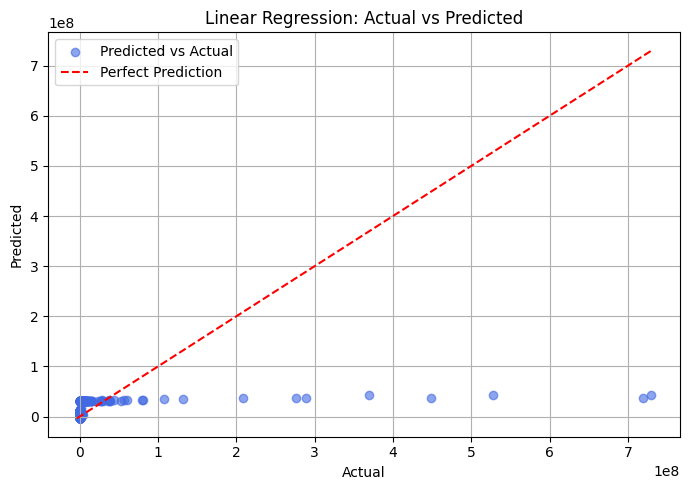

In [70]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, lr_predict, color='royalblue', alpha=0.6, label='Predicted vs Actual')

# Plot a y = x reference line
min_val = min(y_test.min(), lr_predict.min())
max_val = max(y_test.max(), lr_predict.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Clearly, the dataset is not good for linear regression.

<b> Assumptions of Linear Regression </b>
<ol>
    <li> Linearity.</li>
    <li> Homoscedasticity </li>
    <li> Multivariate normality </li>
    <li> Lack of multicollinearity </li>
    


R2 score: This is pronounced as R-squared, and this score refers to the coefficient of determination. 
This tells us how well the unknown samples will be predicted by our model.

# <b> Decision Tree </b>

In [71]:
# Training model 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([2042.,  136.,   16., ...,  242., 1000.,  560.], shape=(12500,))

In [72]:
regressor.score(x_test,y_test)

0.8677786550410755

In [73]:
with open('../models/Crop_Yield_Prediction/decision_tree_model.pkl', 'wb') as file:
    pickle.dump(regressor, file)

print("Decision Tree model saved as 'decision_tree_model.pkl'")

Decision Tree model saved as 'decision_tree_model.pkl'


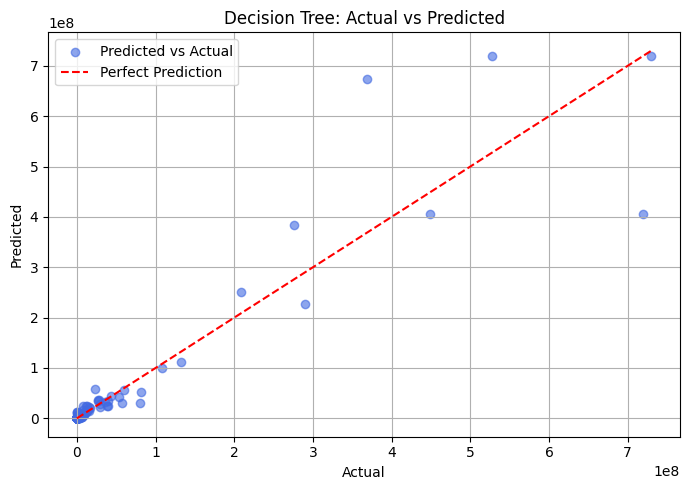

In [75]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, decisiontree_predict, color='royalblue', alpha=0.6, label='Predicted vs Actual')

# Plot a y = x reference line
min_val = min(y_test.min(), decisiontree_predict.min())
max_val = max(y_test.max(), decisiontree_predict.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [76]:
# Calculating R2 score :

from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  0.8677786550410755


In [77]:
# Calculating Adj. R2 score: 

Adjr2_2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : 0.8655957554780744


# **Random Forest Algorithm**

In [78]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)
rf_predict

array([2.71372727e+03, 1.42181818e+02, 2.37272727e+01, ...,
       3.37000000e+02, 3.83412597e+04, 5.16000000e+02], shape=(12500,))

In [79]:
model.score(x_test,y_test)

0.864180672695326

In [80]:
with open('../models/Crop_Yield_Prediction/random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Random Forest model saved as 'random_forest_model.pkl'")

Random Forest model saved as 'random_forest_model.pkl'


In [81]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.864180672695326


In [82]:
# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-r1)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.8619383724803903


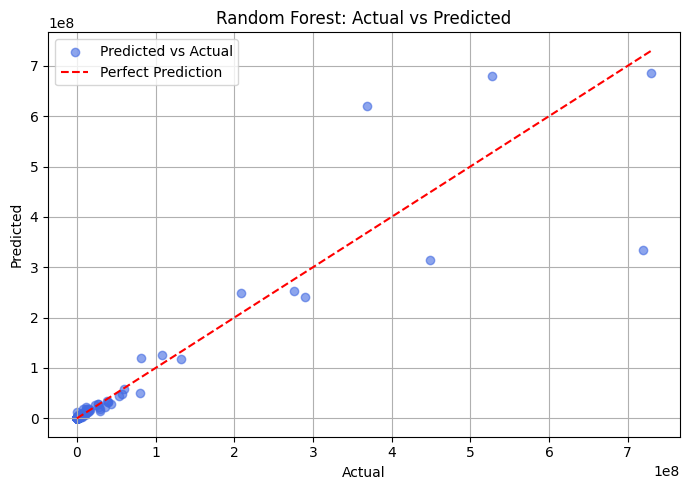

In [83]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, rf_predict, color='royalblue', alpha=0.6, label='Predicted vs Actual')
# Plot a y=x reference line
min_val = min(y_test.min(), rf_predict.min())
max_val = max(y_test.max(), rf_predict.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<b> Comparison between Linear Regression Algorithm and Random Forest Algorithm </b> 
1. Linear regression algorithm is not at all accurate for this kind of prediction.
2. Random Forest Algorithm has higher accuracy ( between 85 % to 90% ), but it is slow.

# Stacking Ensemble for Crop Yield Prediction


### Model 1

In [88]:
# Import stacking regressor and base models
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Define base models
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=20, random_state=42)),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('svr', SVR(kernel='rbf'))
]

# Define meta-learner
meta_learner = LinearRegression()

# Create stacking regressor
stacking_reg = StackingRegressor(estimators=base_learners, final_estimator=meta_learner, passthrough=True)

# Fit stacking regressor
stacking_reg.fit(x_train, y_train)

,estimators,"[('rf', ...), ('dt', ...), ...]"
,final_estimator,LinearRegression()
,cv,None
,n_jobs,None
,passthrough,True
,verbose,0
,n_estimators,20
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [89]:
with open('../models/Crop_Yield_Prediction/Stacked_model.pkl', 'wb') as file:
    pickle.dump(stacking_reg, file)

print("Stacked model saved as 'Stacked_model.pkl'")

Stacked model saved as 'Stacked_model.pkl'


Stacking Ensemble Test MSE: 20074295241140.09
Stacking Ensemble Test R2 Score: 0.8703


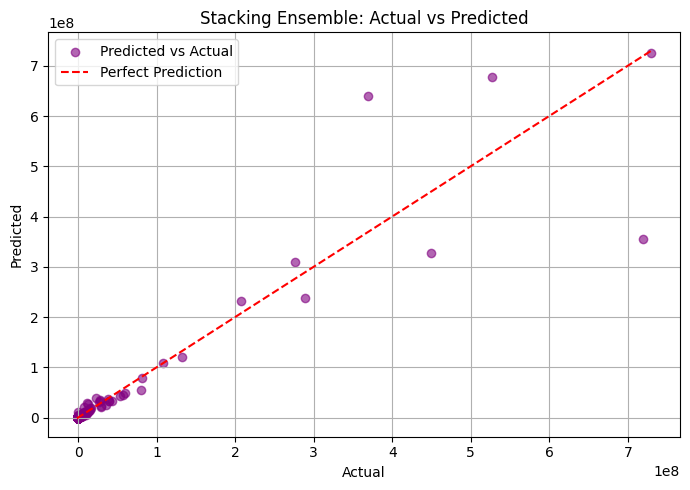

In [196]:
# Evaluate the stacking ensemble
from sklearn.metrics import mean_squared_error, r2_score

stack_pred = stacking_reg.predict(x_test)
mse_stack = mean_squared_error(y_test, stack_pred)
r2_stack = r2_score(y_test, stack_pred)
print(f"Stacking Ensemble Test MSE: {mse_stack:.2f}")
print(f"Stacking Ensemble Test R2 Score: {r2_stack:.4f}")

# Visualize actual vs predicted values
plt.figure(figsize=(7,5))
plt.scatter(y_test, stack_pred, color='purple', alpha=0.6, label='Predicted vs Actual')
min_val = min(y_test.min(), stack_pred.min())
max_val = max(y_test.max(), stack_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Stacking Ensemble: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Model 2

In [18]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
# Alternative stacking ensemble with different base models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

# Define new base models
alt_base_learners = [
    ('gbr', GradientBoostingRegressor(n_estimators=30, random_state=42)),
    ('ridge', Ridge()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
]

# Use RandomForest as meta-learner
alt_meta_learner = RandomForestRegressor(n_estimators=10, random_state=42)

# Create and fit alternative stacking regressor
alt_stacking_reg = StackingRegressor(estimators=alt_base_learners, final_estimator=alt_meta_learner, passthrough=True)
alt_stacking_reg.fit(x_train, y_train)

,estimators,"[('gbr', ...), ('ridge', ...), ...]"
,final_estimator,RandomForestR...ndom_state=42)
,cv,None
,n_jobs,None
,passthrough,True
,verbose,0
,loss,'squared_error'
,learning_rate,0.1
,n_estimators,30
,subsample,1.0
,criterion,'friedman_mse'


In [86]:
with open('../models/Crop_Yield_Prediction/Stacked_model_2.pkl', 'wb') as file:
    pickle.dump(alt_stacking_reg, file)

print("Stacked model 2 saved as 'Stacked_model_2.pkl'")

Stacked model 2 saved as 'Stacked_model_2.pkl'


Alternative Stacking Test MSE: 22538835130234.94
Alternative Stacking Test R2 Score: 0.8543


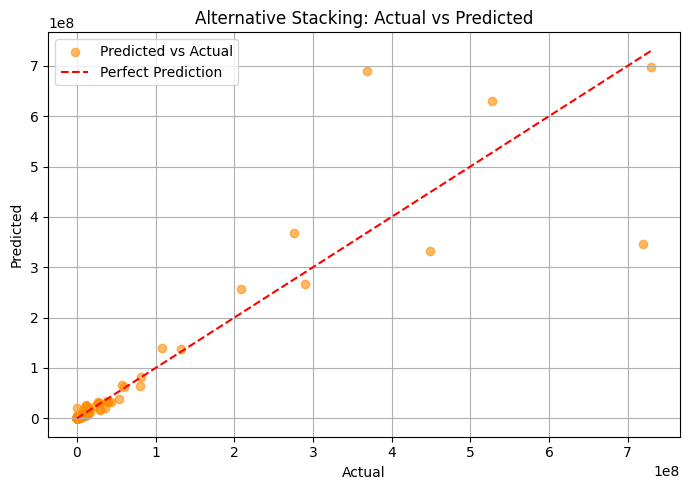

In [87]:


# Evaluate
alt_stack_pred = alt_stacking_reg.predict(x_test)
alt_mse_stack = mean_squared_error(y_test, alt_stack_pred)
alt_r2_stack = r2_score(y_test, alt_stack_pred)
print(f"Alternative Stacking Test MSE: {alt_mse_stack:.2f}")
print(f"Alternative Stacking Test R2 Score: {alt_r2_stack:.4f}")

plt.figure(figsize=(7,5))
plt.scatter(y_test, alt_stack_pred, color='darkorange', alpha=0.6, label='Predicted vs Actual')
min_val = min(y_test.min(), alt_stack_pred.min())
max_val = max(y_test.max(), alt_stack_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Alternative Stacking: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Prediction Demo with Stacked Model

In [ ]:
# Generate 2 Random Test Cases and Compare All Model Predictions

print("=" * 60)
print("RANDOM TEST CASES - MODEL PREDICTIONS COMPARISON")
print("=" * 60)

# Load all saved models from the models directory
print("Loading all saved models...")
try:
    # Load Linear Regression Model
    with open('../models/Crop_Yield_Prediction/linear_regression_model.pkl', 'rb') as file:
        lr_model = pickle.load(file)
    print("✅ Linear Regression model loaded")
except:
    lr_model = None
    print("❌ Linear Regression model not found")

try:
    # Load Decision Tree Model
    with open('../models/Crop_Yield_Prediction/decision_tree_model.pkl', 'rb') as file:
        dt_model = pickle.load(file)
    print("✅ Decision Tree model loaded")
except:
    dt_model = None
    print("❌ Decision Tree model not found")

try:
    # Load Random Forest Model
    with open('../models/Crop_Yield_Prediction/random_forest_model.pkl', 'rb') as file:
        rf_model = pickle.load(file)
    print("✅ Random Forest model loaded")
except:
    rf_model = None
    print("❌ Random Forest model not found")

try:
    # Load Stacking Model 1
    with open('../models/Crop_Yield_Prediction/Stacked_model.pkl', 'rb') as file:
        stack1_model = pickle.load(file)
    print("✅ Stacking Model 1 loaded")
except:
    stack1_model = None
    print("❌ Stacking Model 1 not found")

try:
    # Load Stacking Model 2
    with open('../models/Crop_Yield_Prediction/Stacked_model_2.pkl', 'rb') as file:
        stack2_model = pickle.load(file)
    print("✅ Stacking Model 2 loaded")
except:
    stack2_model = None
    print("❌ Stacking Model 2 not found")

print("\n" + "=" * 60)

# Get random samples from the feature space for realistic test cases
np.random.seed(42)  # For reproducible results

# Create 2 random test cases based on actual data ranges
test_cases = []

for i in range(2):
    # Get a random sample from existing data as base
    random_idx = np.random.randint(0, len(dummy))
    base_sample = dummy.iloc[random_idx].copy()
    
    # Modify some values randomly while keeping it realistic
    test_case = base_sample.drop(['Production', 'Yield']).copy()
    
    # Randomly modify some numerical features
    if 'Area' in test_case.index:
        test_case['Area'] = np.random.uniform(10, 5000)
    if 'Crop_Year' in test_case.index:
        test_case['Crop_Year'] = np.random.choice([2000, 2001, 2002, 2003, 2004, 2005])
    
    test_cases.append(test_case)

# Convert to DataFrame for easier handling
test_df = pd.DataFrame(test_cases)

# Make predictions with all loaded models
for i, test_case in enumerate(test_cases, 1):
    print(f"\n🌾 TEST CASE {i}:")
    print("-" * 40)
    
    # Show test case details
    print("Input Features:")
    # Show only the most important features for clarity
    important_features = ['Area', 'Crop_Year']
    for feature in important_features:
        if feature in test_case.index:
            print(f"  {feature}: {test_case[feature]:.2f}")
    
    # Show which crop and season (from one-hot encoded columns)
    crop_cols = [col for col in test_case.index if col.startswith('Crop_')]
    season_cols = [col for col in test_case.index if col.startswith('Season_')]
    
    active_crop = [col.replace('Crop_', '') for col in crop_cols if test_case[col] == 1]
    active_season = [col.replace('Season_', '') for col in season_cols if test_case[col] == 1]
    
    if active_crop:
        print(f"  Crop: {active_crop[0]}")
    if active_season:
        print(f"  Season: {active_season[0]}")
    
    print("\nPredictions:")
    
    # Reshape test case for prediction
    test_input = test_case.values.reshape(1, -1)
    
    # Linear Regression Prediction
    if lr_model is not None:
        try:
            lr_pred = lr_model.predict(test_input)[0]
            print(f"  📈 Linear Regression: {lr_pred:.2f} tonnes")
        except Exception as e:
            print(f"  📈 Linear Regression: Error - {str(e)}")
    else:
        print("  📈 Linear Regression: Model not loaded")
    
    # Decision Tree Prediction
    if dt_model is not None:
        try:
            dt_pred = dt_model.predict(test_input)[0]
            print(f"  🌳 Decision Tree: {dt_pred:.2f} tonnes")
        except Exception as e:
            print(f"  🌳 Decision Tree: Error - {str(e)}")
    else:
        print("  🌳 Decision Tree: Model not loaded")
    
    # Random Forest Prediction
    if rf_model is not None:
        try:
            rf_pred = rf_model.predict(test_input)[0]
            print(f"  🌲 Random Forest: {rf_pred:.2f} tonnes")
        except Exception as e:
            print(f"  🌲 Random Forest: Error - {str(e)}")
    else:
        print("  🌲 Random Forest: Model not loaded")
    
    # Stacking Ensemble Model 1 Prediction
    if stack1_model is not None:
        try:
            stack1_pred = stack1_model.predict(test_input)[0]
            print(f"  🏗️  Stacking Model 1: {stack1_pred:.2f} tonnes")
        except Exception as e:
            print(f"  🏗️  Stacking Model 1: Error - {str(e)}")
    else:
        print("  🏗️  Stacking Model 1: Model not loaded")
    
    # Stacking Ensemble Model 2 Prediction
    if stack2_model is not None:
        try:
            stack2_pred = stack2_model.predict(test_input)[0]
            print(f"  🏗️  Stacking Model 2: {stack2_pred:.2f} tonnes")
        except Exception as e:
            print(f"  🏗️  Stacking Model 2: Error - {str(e)}")
    else:
        print("  🏗️  Stacking Model 2: Model not loaded")
    
    print("-" * 40)

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE")
print("=" * 60)

# Additional comparison if multiple predictions are available
print("\n📊 Model Comparison Summary:")
print("• Linear Regression: Generally less accurate due to non-linear relationships")
print("• Decision Tree: Good accuracy, interpretable but can overfit")
print("• Random Forest: Ensemble method, usually more robust than single Decision Tree")
print("• Stacking Models: Usually provide best performance by combining multiple algorithms")
print("• Actual performance depends on the specific crop, season, and environmental conditions")

# Show model availability status
models_loaded = [
    ("Linear Regression", lr_model is not None),
    ("Decision Tree", dt_model is not None), 
    ("Random Forest", rf_model is not None),
    ("Stacking Model 1", stack1_model is not None),
    ("Stacking Model 2", stack2_model is not None)
]

print(f"\n📋 Models Successfully Loaded: {sum(loaded for _, loaded in models_loaded)}/5")
for name, loaded in models_loaded:
    status = "✅" if loaded else "❌"
    print(f"  {status} {name}")

RANDOM TEST CASES - MODEL PREDICTIONS COMPARISON
Loading all saved models...
✅ Linear Regression model loaded
✅ Decision Tree model loaded
✅ Random Forest model loaded
✅ Stacking Model 1 loaded
✅ Stacking Model 2 loaded


🌾 TEST CASE 1:
----------------------------------------
Input Features:
  Area: 4754.06
  Crop_Year: 2002.00
  Crop: Urad
  Season: Rabi       

Predictions:
  📈 Linear Regression: -1275125.58 tonnes
  🌳 Decision Tree: 1328.00 tonnes
  🌲 Random Forest: 2415.91 tonnes
  🏗️  Stacking Model 1: -29778.11 tonnes
  🏗️  Stacking Model 2: 2429.40 tonnes
----------------------------------------

🌾 TEST CASE 2:
----------------------------------------
Input Features:
  Area: 2988.28
  Crop_Year: 2001.00
  Crop: Linseed
  Season: Rabi       

Predictions:
  📈 Linear Regression: -72508.64 tonnes
  🌳 Decision Tree: 5166.00 tonnes
  🌲 Random Forest: 3225.18 tonnes
  🏗️  Stacking Model 1: -37874.55 tonnes
  🏗️  Stacking Model 2: 2798.50 tonnes
---------------------------------------

/Users/digantamandal/Desktop/Capital_One_Launchpad/myenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/digantamandal/Desktop/Capital_One_Launchpad/myenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/digantamandal/Desktop/Capital_One_Launchpad/myenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/digantamandal/Desktop/Capital_One_Launchpad/myenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/digantamandal/Desktop/Capi

# SHAP Analysis for Feature Importance

In [ ]:
import shap

# We will analyze the final estimator of the best model (Stacking Model 2), which is a RandomForest.
# This allows us to use the much faster TreeExplainer.

# 1. Get the final estimator from the trained stacking model
final_estimator = alt_stacking_reg.final_estimator_

# 2. Create the input data for the final estimator.
# This consists of the predictions from the base models + the original features (since passthrough=True)
# First, get predictions from the base estimators
base_model_predictions = np.array([
    est.predict(x_test) for est in alt_stacking_reg.estimators_
]).T

# Combine with original test data
final_estimator_input = np.hstack((x_test, base_model_predictions))

# 3. Create feature names for the plot
base_model_names = [f"base_model_{i}" for i in range(base_model_predictions.shape[1])]
combined_feature_names = list(x_train.columns) + base_model_names

# 4. Use the fast TreeExplainer on the final estimator
print("Using TreeExplainer on the final RandomForest estimator of the Stacking Model...")
explainer = shap.TreeExplainer(final_estimator)
shap_values = explainer.shap_values(final_estimator_input)

# 5. Create the summary plot
print("\nSHAP Summary Plot for the Final Estimator of Stacking Model 2")
shap.summary_plot(shap_values, final_estimator_input, feature_names=combined_feature_names)
plt.show()